# planB (activity_type involved) daily data  --- CNN

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

# load data

In [4]:
df_ori = pd.read_csv('BBB_planB_daily.csv')

In [5]:
df = df_ori.copy()
pd.set_option('display.max_columns', None)
df

T000_Act1  T000_Act10  T000_Act11  T000_Act12  T000_Act2  T000_Act3  \
0          12.0         0.0         0.0         0.0        0.0        0.0   
1           3.0         0.0         0.0         0.0        0.0        0.0   
2           0.0         0.0         0.0         0.0        1.0        3.0   
3         119.0         2.0         3.0         0.0        1.0       44.0   
4           7.0         0.0         0.0         0.0        0.0        2.0   
...         ...         ...         ...         ...        ...        ...   
5336        0.0         0.0         0.0         0.0        0.0        0.0   
5337       66.0         0.0         1.0         0.0       26.0        4.0   
5338        0.0         0.0         0.0         0.0        0.0        0.0   
5339        0.0         0.0         0.0         0.0        0.0        0.0   
5340        0.0         0.0         0.0         0.0        0.0        0.0   

      T000_Act4  T000_Act5  T000_Act6  T000_Act7  T000_Act8  T000_Act9  \
0           2.0        0.0        0.0        0.0        0.0        0.0   
1           2.0        0.0        0.0        0.0        0.0        0.0   
2           5.0        0.0        1.0        2.0        0.0        0.0   
3         103.0        0.0       35.0       25.0        0.0        0.0   
4           8.0        0.0        1.0        3.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
5336        0.0        0.0        0.0        0.0        0.0        0.0   
5337       33.0        0.0        8.0        1.0        0.0        0.0   
5338        0.0        0.0        0.0        0.0        0.0        0.0   
5339        0.0        0.0        0.0        0.0        0.0        0.0   
5340        0.0        0.0        0.0        0.0        0.0        0.0   

      T001_Act1  T001_Act10  T001_Act11  T001_Act12  T001_Act2  T001_Act3  \
0           0.0         0.0         0.0         0.0        0.0        0.0   
1           0.0         0.0         0.0         0.0        0.0        0.0   
2           0.0         0.0         0.0         0.0        0.0        0.0   
3          16.0         0.0         0.0         0.0        0.0        0.0   
4           4.0         0.0         0.0         0.0        0.0        3.0   
...         ...         ...         ...         ...        ...        ...   
5336        0.0         0.0         0.0         0.0        0.0        0.0   
5337        0.0         0.0         0.0         0.0        0.0        0.0   
5338        0.0         0.0         0.0         0.0        0.0        0.0   
5339        0.0         0.0         0.0         0.0        0.0        0.0   
5340        0.0         0.0         0.0         0.0        0.0        0.0   

      T001_Act4  T001_Act5  T001_Act6  T001_Act7  T001_Act8  T001_Act9  \
0           0.0        0.0        0.0        0.0        0.0        0.0   
1           0.0        0.0        0.0        0.0        0.0        0.0   
2           0.0        0.0        0.0        0.0        0.0        0.0   
3           3.0        0.0        0.0        0.0        0.0        0.0   
4           6.0        1.0        2.0        2.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
5336        0.0        0.0        0.0        0.0        0.0        0.0   
5337        0.0        0.0        0.0        0.0        0.0        0.0   
5338        0.0        0.0        0.0        0.0        0.0        0.0   
5339        0.0        0.0        0.0        0.0        0.0        0.0   
5340        0.0        0.0        0.0        0.0        0.0        0.0   

      T002_Act1  T002_Act10  T002_Act11  T002_Act12  T002_Act2  T002_Act3  \
0           7.0         0.0         0.0         0.0        0.0        0.0   
1           0.0         0.0         0.0         0.0        0.0        0.0   
2           3.0         0.0         0.0         0.0        1.0        1.0   
3          92.0         2.0         0.0         0.0        0.0        

# prepare X and y

In [6]:
X = df.drop(['final_result','id'], axis=1)
X

T000_Act1  T000_Act10  T000_Act11  T000_Act12  T000_Act2  T000_Act3  \
0          12.0         0.0         0.0         0.0        0.0        0.0   
1           3.0         0.0         0.0         0.0        0.0        0.0   
2           0.0         0.0         0.0         0.0        1.0        3.0   
3         119.0         2.0         3.0         0.0        1.0       44.0   
4           7.0         0.0         0.0         0.0        0.0        2.0   
...         ...         ...         ...         ...        ...        ...   
5336        0.0         0.0         0.0         0.0        0.0        0.0   
5337       66.0         0.0         1.0         0.0       26.0        4.0   
5338        0.0         0.0         0.0         0.0        0.0        0.0   
5339        0.0         0.0         0.0         0.0        0.0        0.0   
5340        0.0         0.0         0.0         0.0        0.0        0.0   

      T000_Act4  T000_Act5  T000_Act6  T000_Act7  T000_Act8  T000_Act9  \
0           2.0        0.0        0.0        0.0        0.0        0.0   
1           2.0        0.0        0.0        0.0        0.0        0.0   
2           5.0        0.0        1.0        2.0        0.0        0.0   
3         103.0        0.0       35.0       25.0        0.0        0.0   
4           8.0        0.0        1.0        3.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
5336        0.0        0.0        0.0        0.0        0.0        0.0   
5337       33.0        0.0        8.0        1.0        0.0        0.0   
5338        0.0        0.0        0.0        0.0        0.0        0.0   
5339        0.0        0.0        0.0        0.0        0.0        0.0   
5340        0.0        0.0        0.0        0.0        0.0        0.0   

      T001_Act1  T001_Act10  T001_Act11  T001_Act12  T001_Act2  T001_Act3  \
0           0.0         0.0         0.0         0.0        0.0        0.0   
1           0.0         0.0         0.0         0.0        0.0        0.0   
2           0.0         0.0         0.0         0.0        0.0        0.0   
3          16.0         0.0         0.0         0.0        0.0        0.0   
4           4.0         0.0         0.0         0.0        0.0        3.0   
...         ...         ...         ...         ...        ...        ...   
5336        0.0         0.0         0.0         0.0        0.0        0.0   
5337        0.0         0.0         0.0         0.0        0.0        0.0   
5338        0.0         0.0         0.0         0.0        0.0        0.0   
5339        0.0         0.0         0.0         0.0        0.0        0.0   
5340        0.0         0.0         0.0         0.0        0.0        0.0   

      T001_Act4  T001_Act5  T001_Act6  T001_Act7  T001_Act8  T001_Act9  \
0           0.0        0.0        0.0        0.0        0.0        0.0   
1           0.0        0.0        0.0        0.0        0.0        0.0   
2           0.0        0.0        0.0        0.0        0.0        0.0   
3           3.0        0.0        0.0        0.0        0.0        0.0   
4           6.0        1.0        2.0        2.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
5336        0.0        0.0        0.0        0.0        0.0        0.0   
5337        0.0        0.0        0.0        0.0        0.0        0.0   
5338        0.0        0.0        0.0        0.0        0.0        0.0   
5339        0.0        0.0        0.0        0.0        0.0        0.0   
5340        0.0        0.0        0.0        0.0        0.0        0.0   

      T002_Act1  T002_Act10  T002_Act11  T002_Act12  T002_Act2  T002_Act3  \
0           7.0         0.0         0.0         0.0        0.0        0.0   
1           0.0         0.0         0.0         0.0        0.0        0.0   
2           3.0         0.0         0.0         0.0        1.0        1.0   
3          92.0         2.0         0.0         0.0        0.0        

In [7]:
y = df['final_result']
y

0       0
1       1
2       0
3       1
4       1
       ..
5336    1
5337    1
5338    1
5339    0
5340    1
Name: final_result, Length: 5341, dtype: int64

In [8]:
# convert to numpy array
X = X.values
y = y.values

In [9]:
type(X)

numpy.ndarray

In [11]:
type(y)

numpy.ndarray

# 7:3

In [12]:
X_train1, X_test1, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(3738, 3228)
(1603, 3228)
(3738,)
(1603,)


# MinMaxScaler

In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train1)
X_test = min_max_scaler.fit_transform(X_test1)

# reshape

In [20]:
# reshape into correct dimensions to input into cnn
X_train = X_train.reshape(3738,3228,1)
X_test = X_test.reshape(1603,3228,1)

# build CNN model

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
X_train.shape[1:]

(3228, 1)

In [35]:
batch_size = 128

In [41]:
## 
lr=0.0001 
epochs = 200

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.5167 - accuracy: 0.8447 (lr=0.0001, epochs = 200)

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4890 - accuracy: 0.7024 (lr=0.00001, epochs = 100)

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4239 - accuracy: 0.8659 (lr=0.0001 , epochs = 100) --> best

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 1.4731 - accuracy: 0.8153 (lr=0.001, epochs = 100)

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

# fit CNN model

In [42]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 1613, 64)          256       
                                                                 
 activation_3 (Activation)   (None, 1613, 64)          0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 806, 64)          0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 806, 64)           0         
                                                                 
 flatten_3 (Flatten)         (None, 51584)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51585     
                                                      

In [43]:
history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/200
30/30 [==============================] - 3s 101ms/step - loss: 0.6547 - accuracy: 0.6875 - val_loss: 0.5899 - val_accuracy: 0.7024
Epoch 2/200
30/30 [==============================] - 3s 99ms/step - loss: 0.5801 - accuracy: 0.7025 - val_loss: 0.5612 - val_accuracy: 0.7024
Epoch 3/200
30/30 [==============================] - 3s 98ms/step - loss: 0.5661 - accuracy: 0.7025 - val_loss: 0.5509 - val_accuracy: 0.7024
Epoch 4/200
30/30 [==============================] - 3s 99ms/step - loss: 0.5582 - accuracy: 0.7025 - val_loss: 0.5410 - val_accuracy: 0.7024
Epoch 5/200
30/30 [==============================] - 3s 99ms/step - loss: 0.5494 - accuracy: 0.7025 - val_loss: 0.5307 - val_accuracy: 0.7024
Epoch 6/200
30/30 [==============================] - 3s 98ms/step - loss: 0.5404 - accuracy: 0.7025 - val_loss: 0.5213 - val_accuracy: 0.7024
Epoch 7/200
30/30 [==============================] - 3s 98ms/step - loss: 0.5317 - accuracy: 0.7025 - val_loss: 0.5128 - val_accuracy: 0.7024
Epoch

30/30 [==============================] - 3s 99ms/step - loss: 0.3698 - accuracy: 0.8887 - val_loss: 0.4109 - val_accuracy: 0.8609
Epoch 59/200
30/30 [==============================] - 3s 101ms/step - loss: 0.3680 - accuracy: 0.8911 - val_loss: 0.4109 - val_accuracy: 0.8621
Epoch 60/200
30/30 [==============================] - 3s 101ms/step - loss: 0.3672 - accuracy: 0.8909 - val_loss: 0.4108 - val_accuracy: 0.8621
Epoch 61/200
30/30 [==============================] - 3s 100ms/step - loss: 0.3655 - accuracy: 0.8903 - val_loss: 0.4112 - val_accuracy: 0.8615
Epoch 62/200
30/30 [==============================] - 3s 100ms/step - loss: 0.3644 - accuracy: 0.8911 - val_loss: 0.4116 - val_accuracy: 0.8615
Epoch 63/200
30/30 [==============================] - 3s 103ms/step - loss: 0.3629 - accuracy: 0.8906 - val_loss: 0.4114 - val_accuracy: 0.8659
Epoch 64/200
30/30 [==============================] - 3s 105ms/step - loss: 0.3615 - accuracy: 0.8922 - val_loss: 0.4109 - val_accuracy: 0.8665
Epoch 

30/30 [==============================] - 3s 105ms/step - loss: 0.3049 - accuracy: 0.9040 - val_loss: 0.4370 - val_accuracy: 0.8497
Epoch 116/200
30/30 [==============================] - 3s 105ms/step - loss: 0.3046 - accuracy: 0.9042 - val_loss: 0.4373 - val_accuracy: 0.8497
Epoch 117/200
30/30 [==============================] - 3s 105ms/step - loss: 0.3033 - accuracy: 0.9026 - val_loss: 0.4368 - val_accuracy: 0.8509
Epoch 118/200
30/30 [==============================] - 3s 105ms/step - loss: 0.3026 - accuracy: 0.9053 - val_loss: 0.4381 - val_accuracy: 0.8497
Epoch 119/200
30/30 [==============================] - 3s 105ms/step - loss: 0.3016 - accuracy: 0.9037 - val_loss: 0.4395 - val_accuracy: 0.8503
Epoch 120/200
30/30 [==============================] - 3s 102ms/step - loss: 0.2996 - accuracy: 0.9042 - val_loss: 0.4400 - val_accuracy: 0.8509
Epoch 121/200
30/30 [==============================] - 3s 98ms/step - loss: 0.2994 - accuracy: 0.9053 - val_loss: 0.4407 - val_accuracy: 0.8503


Epoch 172/200
30/30 [==============================] - 3s 99ms/step - loss: 0.2597 - accuracy: 0.9117 - val_loss: 0.4870 - val_accuracy: 0.8465
Epoch 173/200
30/30 [==============================] - 3s 100ms/step - loss: 0.2592 - accuracy: 0.9120 - val_loss: 0.4876 - val_accuracy: 0.8447
Epoch 174/200
30/30 [==============================] - 3s 99ms/step - loss: 0.2588 - accuracy: 0.9109 - val_loss: 0.4882 - val_accuracy: 0.8440
Epoch 175/200
30/30 [==============================] - 3s 100ms/step - loss: 0.2575 - accuracy: 0.9125 - val_loss: 0.4895 - val_accuracy: 0.8447
Epoch 176/200
30/30 [==============================] - 3s 101ms/step - loss: 0.2573 - accuracy: 0.9114 - val_loss: 0.4908 - val_accuracy: 0.8447
Epoch 177/200
30/30 [==============================] - 3s 99ms/step - loss: 0.2561 - accuracy: 0.9117 - val_loss: 0.4920 - val_accuracy: 0.8447
Epoch 178/200
30/30 [==============================] - 3s 101ms/step - loss: 0.2554 - accuracy: 0.9117 - val_loss: 0.4933 - val_accur

In [44]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 5ms/step - loss: 0.5167 - accuracy: 0.8447


[0.5166664123535156, 0.8446662425994873]

# plot CNN learning process

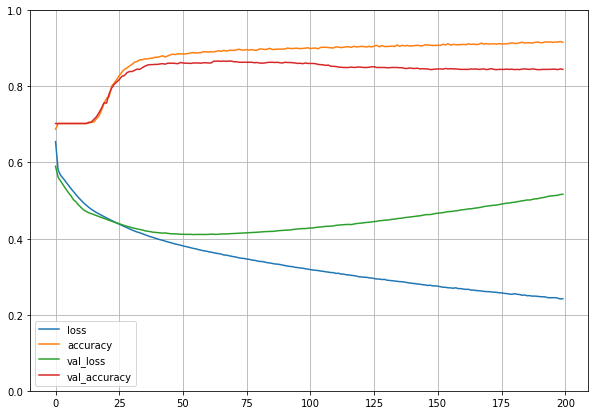

In [45]:
import pandas as pd

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()